Задача:

Производственная система состоит из m станков,каждый из которых подвержен случайным поломкам.  Перед поломкой станок работает в течение промежутка времени, который представляет собой экспоненциально распределённую случайную величину со средним значением 8 часов.  Ремонтом станков занимается s ремонтников(где s — фиксированное положительное целое число). Для того, чтобы починить один станок, одному ремонтнику требуется экспоненциально распределенный промежуток времени со средним значением 2 часа; Ремонтом сломанного станка может заниматься только один ремонтник, даже если в это время есть другие свободные ремонтники. Если одновременно ломается более s станков, они формируют очередь на ремонт с дисциплиной FIFO и ждут первого свободного ремонтника.  Далее ремонтник чинит сломанный станок до тех пор, пока он не будет починен, независимо от того, что еще происходит в системе.  Предположим, что каждый час поломки одного станка стоит 50 долларов, а час работы ремонтника стоит 10 долларов.  (Ремонтникам платят почасовую оплату независимо от того, работают ли они на самом деле.) 

Предположим, что количество станков в системе равно m = 5, но напишите общий код, позволяющий учитывать значение m, достигающее 20, путем изменения входного параметра.

Смоделируйте систему ровно при 800 часах работы для каждой стратегии занятости ( s = 1, 2, 3, 4, 5 ) ,  чтобы определить, какая из них приводит к наименьшим ожидаемым средним затратам в час, допустив, что в момент времени 0 все машины только что были отремонтированы.

In [2]:
import numpy as np

def exponential_distribution(mean, size):
    return np.random.exponential(mean, size)

def simulate_system(m, s, hours):
    machine_working_time = exponential_distribution(8, m)
    machine_breakdown_time = np.zeros(m)
    total_cost = 0

    for hour in range(hours):
        for i in range(m):
            if machine_breakdown_time[i] == 0:
                machine_working_time[i] -= 1
                if machine_working_time[i] <= 0:
                    machine_breakdown_time[i] = exponential_distribution(8, 1)
            else:
                machine_breakdown_time[i] -= 1
                if machine_breakdown_time[i] <= 0:
                    machine_breakdown_time[i] = 0
                    machine_working_time[i] = exponential_distribution(8, 1)
                    total_cost += 50

        repair_queue = 0
        for i in range(m):
            if machine_breakdown_time[i] > 0:
                repair_queue += 1

        while repair_queue > 0:
            repair_time = exponential_distribution(2, 1)
            total_cost += s * 10
            repair_queue -= s
            if repair_queue < 0:
                total_cost -= (abs(repair_queue) * 10)

    return total_cost / hours


m_values = range(5, 21, 1)
s_values = range (1, 6, 1)

for m in m_values:
    for s in s_values:
        avg_cost = simulate_system(m, s, 800)
        print(f"Для кол-ва станков в системе m = {m} и кол-ва ремонтников s = {s}, ожидаемая средняя затрата в час: {avg_cost}")

/tmp/ipykernel_100024/2818158500.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  machine_breakdown_time[i] = exponential_distribution(8, 1)
/tmp/ipykernel_100024/2818158500.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  machine_working_time[i] = exponential_distribution(8, 1)


Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 1, ожидаемая средняя затрата в час: 41.125
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 2, ожидаемая средняя затрата в час: 39.2625
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 3, ожидаемая средняя затрата в час: 40.8875
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 4, ожидаемая средняя затрата в час: 40.2375
Для кол-ва станков в системе m = 5 и кол-ва ремонтников s = 5, ожидаемая средняя затрата в час: 38.8125
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 1, ожидаемая средняя затрата в час: 47.7125
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 2, ожидаемая средняя затрата в час: 48.6875
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 3, ожидаемая средняя затрата в час: 48.475
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 4, ожидаемая средняя затрата в час: 45.4875
Для кол-ва станков в системе m = 6 и кол-ва ремонтников s = 5, ожи

In [3]:
for m in m_values:
    for s in s_values:
        avg_cost = simulate_system(m, s, 800)
        print( m, s, avg_cost)

/tmp/ipykernel_100024/2818158500.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  machine_breakdown_time[i] = exponential_distribution(8, 1)
/tmp/ipykernel_100024/2818158500.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  machine_working_time[i] = exponential_distribution(8, 1)


5 1 40.4875
5 2 40.925
5 3 40.2375
5 4 39.8625
5 5 41.7
6 1 48.775
6 2 47.775
6 3 47.0
6 4 45.2875
6 5 48.975
7 1 55.05
7 2 55.0625
7 3 56.5
7 4 52.9625
7 5 54.0
8 1 62.55
8 2 63.2875
8 3 63.8375
8 4 63.725
8 5 65.1125
9 1 67.5375
9 2 71.925
9 3 72.775
9 4 72.6
9 5 69.4875
10 1 77.95
10 2 78.125
10 3 78.1
10 4 75.2375
10 5 76.225
11 1 89.8
11 2 83.7
11 3 88.2
11 4 86.5875
11 5 87.5625
12 1 95.675
12 2 93.6375
12 3 96.2625
12 4 93.9
12 5 96.6375
13 1 101.675
13 2 102.225
13 3 104.475
13 4 99.825
13 5 101.75
14 1 109.675
14 2 107.9375
14 3 108.525
14 4 109.4625
14 5 109.8375
15 1 115.6875
15 2 115.6375
15 3 117.475
15 4 114.7875
15 5 118.2625
16 1 124.675
16 2 128.1625
16 3 126.8875
16 4 127.9625
16 5 129.025
17 1 135.2
17 2 129.2375
17 3 134.6875
17 4 135.2875
17 5 134.675
18 1 144.9375
18 2 139.225
18 3 137.8
18 4 143.5125
18 5 143.0625
19 1 150.075
19 2 148.1625
19 3 152.175
19 4 148.95
19 5 153.7875
20 1 155.075
20 2 154.4625
20 3 155.725
20 4 158.975
20 5 163.4875


In [5]:
import pandas as pd
data = pd.read_csv('output_1.txt', sep = ' ', header = None)
data.columns = ['m', 's', 'avg_cost']
data

,m,s,avg_cost
0,5,1,40.8125
1,5,2,37.4250
2,5,3,40.6000
3,5,4,39.9500
4,5,5,37.5625
...,...,...,...
75,20,1,158.2125
76,20,2,157.2000
77,20,3,159.0250
78,20,4,159.4000


In [6]:
# Выясним, какая стратегия занятости (кол-во ремонтников в системе) нам будет наиболее выгодна, если в системе от 5 до 20 станков 
# для каждого m нам нужно оставить такое s , для которого avg_cost будет наименьшее 

# Можно сделать это с помощью метода groupby и функции idxmin в pandas
min_avg_cost_idx = data.groupby('m')['avg_cost'].idxmin() #нахождение индексов минимальных значений avg_cost для каждого m
new_data = data.loc[min_avg_cost_idx] #создание нового DataFrame на основе найденных индексов
new_data

,m,s,avg_cost
1,5,2,37.4250
7,6,3,45.3500
13,7,4,55.0375
19,8,5,62.2500
23,9,4,69.4750
29,10,5,76.4750
30,11,1,85.9500
36,12,2,92.1500
41,13,2,102.7125
48,14,4,107.0500


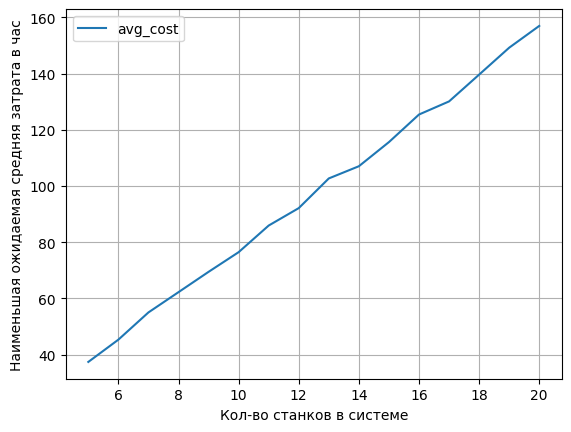

In [18]:
import matplotlib.pyplot as plt

new_data.plot(x = 'm', y = 'avg_cost')
plt.xlabel('Кол-во станков в системе')
plt.ylabel('Ожидаемая средняя затрата в час')
plt.grid(True)
plt.show()


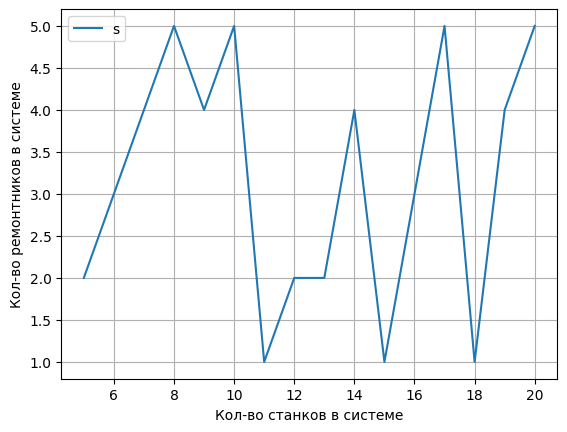

In [19]:
new_data.plot(x = 'm', y = 's')
plt.xlabel('Кол-во станков в системе')
plt.ylabel('Кол-во ремонтников в системе')
plt.grid(True)
plt.show()